In [12]:
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms
import random
import time
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
import schedule_v2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
schedule = schedule_v2.DutyScheduleProblem()

In [3]:
# Genetic Algorithm constants:
POPULATION_SIZE = 300
P_CROSSOVER = 0.9 # probability for crossover
P_MUTATION = 0.1 # probability for mutating an individual
MAX_GENERATIONS = 100
HALL_OF_FAME_SIZE = 1

In [4]:
toolbox = base.Toolbox()

# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMin)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, len(schedule))

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

def knapsackValue(individual):
  return schedule.getValue(individual),

toolbox.register("evaluate", knapsackValue)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/len(schedule))

In [5]:
def GA(n=POPULATION_SIZE, cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, verbose=False):
  # create initial population (generation 0):
  random.seed(14)
  population = toolbox.populationCreator(n=n)

  # prepare the statistics object:
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("min", numpy.min)
  stats.register("avg", numpy.mean)

  # define the hall-of-fame object:
  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  # perform the Genetic Algorithm flow with hof feature added:
  population, logbook = algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=verbose)

  # print best solution found:
  best = hof.items[0]
  if (verbose):
    print("-- Best Ever Individual = ", best)
    print("-- Best Ever Fitness = ", best.fitness.values[0])
    print("-- Knapsack Items = ")
    schedule.printItems(best)

  return best, logbook

In [ ]:
best, logbook = GA(verbose=True)

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")
# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
plt.show()

ngen 	f(x) 	elapsed
10 	 21.0 	 0.3052370548248291
20 	 3.0 	 0.6350674629211426
30 	 2.0 	 0.9398040771484375
40 	 0.0 	 1.1648838520050049
50 	 0.0 	 1.451570987701416
60 	 0.0 	 1.8089792728424072


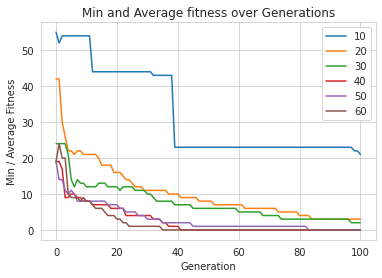

In [24]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

print('ngen', '\tf(x)', '\telapsed')
for ngen in [10, 20, 30, 40, 50, 60]:
  startTime = time.time()
  best, logbook = GA(n=ngen)
  endTime = time.time()
  totalTime = endTime - startTime
  print(ngen, '\t', best.fitness.values[0], '\t', totalTime)
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=ngen)
  
plt.legend()
plt.show()

cxpb 	f(x) 	elapsed
0.1 	 0.0 	 2.1545968055725098
0.3 	 0.0 	 1.2343268394470215
0.5 	 0.0 	 1.4110195636749268
0.7 	 0.0 	 1.6115391254425049
0.9 	 0.0 	 1.780524492263794


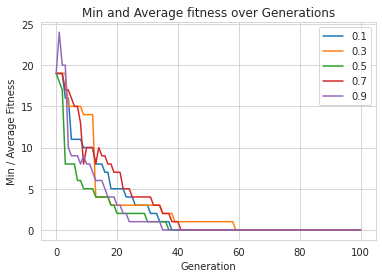

In [26]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

print('cxpb', '\tf(x)', '\telapsed')
for cxpb in [0.1, 0.3, 0.5, 0.7, 0.9]:
  startTime = time.time()
  best, logbook = GA(n=60, cxpb=cxpb)
  endTime = time.time()
  totalTime = endTime - startTime
  print(cxpb, '\t', best.fitness.values[0], '\t', totalTime)
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=cxpb)
  
plt.legend()
plt.show()

mutpb 	f(x) 	elapsed
0.9 	 1.0 	 1.7805888652801514
0.9 	 0.0 	 1.7741293907165527
0.9 	 2.0 	 1.744896411895752
0.9 	 0.0 	 1.75410795211792
0.9 	 0.0 	 1.7576611042022705
0.9 	 0.0 	 1.7326939105987549


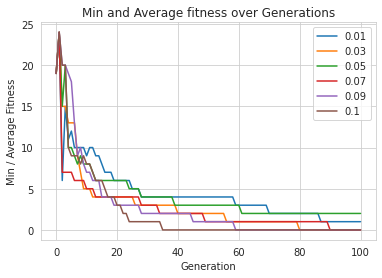

In [28]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

print('mutpb', '\tf(x)', '\telapsed')
for mutpb in [0.01, 0.03, 0.05, 0.07, 0.09, 0.1]:
  startTime = time.time()
  best, logbook = GA(n=60, cxpb=0.9, mutpb=mutpb)
  endTime = time.time()
  totalTime = endTime - startTime
  print(cxpb, '\t', best.fitness.values[0], '\t', totalTime)
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=mutpb)
  
plt.legend()
plt.show()